# Medical Insurance

**Student Number: 1933028**

The purpose of this dataset is to find correlations between total medical costs and the other factors.

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Describing and Cleaning the Data

**DESCRIBING THE DATA**

In [3]:
initial_df = pd.read_csv('insurance.csv')
initial_df.head()

,age,sex,bmi,children,smoker,region,charges,premium
0,19,female,27.900,0,yes,southwest,16884.92400,350
1,18,male,33.770,1,no,southeast,1725.55230,200
2,28,male,33.000,3,no,southeast,4449.46200,100
3,33,male,22.705,0,no,northwest,21984.47061,200
4,32,male,28.880,0,no,northwest,3866.85520,350


In [4]:
initial_df.describe()

,age,bmi,children,charges,premium
count,1353.000000,1353.000000,1353.000000,1338.000000,1353.000000
mean,39.157428,30.670080,1.118256,13270.422265,287.730968
std,14.021578,6.093331,1.229290,12110.011237,152.363854
min,18.000000,15.960000,0.000000,1121.873900,100.000000
25%,26.000000,26.290000,0.000000,4740.287150,100.000000
50%,39.000000,30.400000,1.000000,9382.033000,350.000000
75%,51.000000,34.700000,2.000000,16639.912515,500.000000
max,64.000000,53.130000,5.000000,63770.428010,500.000000


In [5]:
initial_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

**IDENTIFYING MISSING VALUES AND DUPLICATES**

In [6]:
# Missing values 

initial_df.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker      15
region       0
charges     15
premium      0
dtype: int64

In [7]:
# Duplicates 

print("Number of duplicate entries: " , len(initial_df[initial_df.duplicated()]))

Number of duplicate entries:  0


In [8]:
missing_data = initial_df[initial_df.isnull().any(axis=1)]
missing_data

,age,sex,bmi,children,smoker,region,charges,premium
1338,36,female,31.344096,2,NaN,southeast,NaN,200
1339,26,female,39.145120,2,NaN,northwest,NaN,500
1340,52,male,33.293596,3,NaN,northeast,NaN,200
1341,45,female,24.350606,2,NaN,northwest,NaN,200
1342,24,female,25.913477,5,NaN,northeast,NaN,350
1343,37,female,20.042088,5,NaN,southeast,NaN,200
1344,47,male,29.236661,4,NaN,southeast,NaN,500
1345,32,female,30.142417,1,NaN,southeast,NaN,500
1346,43,female,36.810516,5,NaN,southeast,NaN,500
1347,23,female,38.295417,1,NaN,northwest,NaN,200


Observation: The missing data in the charges column is a direct result of missing data in the smoker column. In this situation, the smoker data is missing completely at random (MCAR)

In [9]:
percentage_missing = (len(missing_data)/len(initial_df))*100
print(percentage_missing,'%')

1.1086474501108647 %


Using the 3% rule, we can safely remove these entries from our data

In [10]:
initial_df = initial_df.dropna()
initial_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
premium     0
dtype: int64

**CONVERTING VARIABLES TO RELEVANT DATATYPES**

Categorical columns: sex, smoker and region

In [11]:
one_hot_sex = pd.get_dummies(initial_df['sex'])
one_hot_smoker = pd.get_dummies(initial_df['smoker'],prefix="smoker")
one_hot_region = pd.get_dummies(initial_df['region'])

In [12]:
df = initial_df.drop(['sex','smoker','region'],axis=1)
df = df.join([one_hot_sex,one_hot_smoker,one_hot_region])

In [13]:
df.head()

,age,bmi,children,charges,premium,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,350,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,200,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,100,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,200,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,350,0,1,1,0,0,1,0,0


# Exploring the Data

**PLOTTING THE TARGET VARIABLE**

In [14]:
# df.boxplot(column=['charges'])  

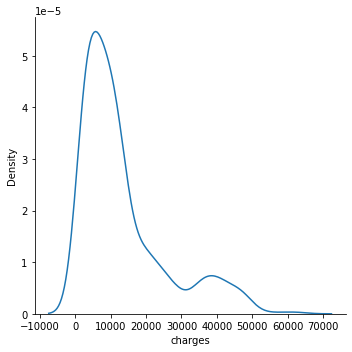

In [15]:
sns.displot(df,x="charges",kind='kde')

Observation: 
Plotting the charges of the data produces a multimodal distribution that is skewed right. The kurtosis of this is leptokurtis as shown by the heavy tail of the distribution

**CORRELATION BETWEEN CHARGES AND OTHER VARIABLES**

Text(0.5, 1.0, 'Correlation Heatmap')

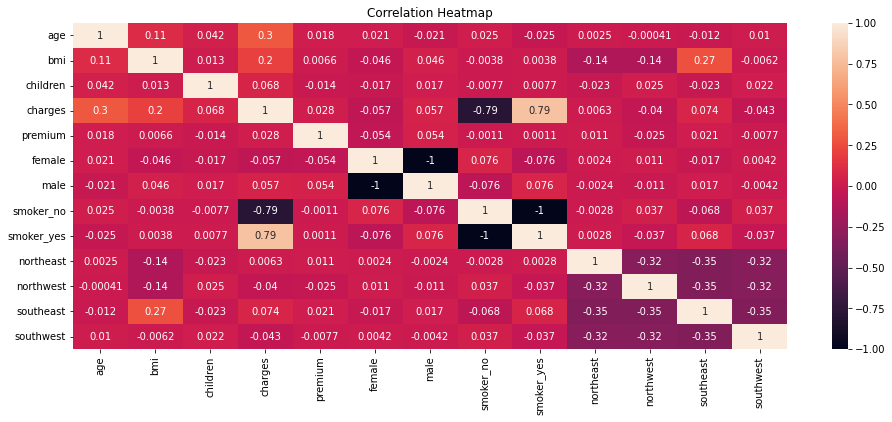

In [16]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap')

Observation: 

It clear from the correlation heatmap that 'charges' is highly correlated to whether or not a client is a smoker. 
The correlation is highly positive if the client is a smoker, and highly negative if the client is a non-smoker. In addition to this, the charges correlate quite significantly with the age and BMI of a client. However, outside of these aforemention features, there is very little correlation. 

**RELATIONSHIP BETWEEN SMOKERS AND CHARGES**

Text(0.5, 1.0, 'Number of smokers and non-smokers')

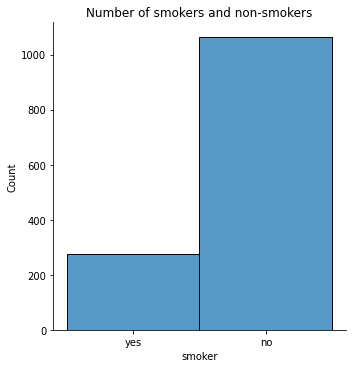

In [17]:
sns.displot(initial_df, x="smoker")
plt.title("Number of smokers and non-smokers")

Text(0.5, 1.0, 'Smokers vs Non-Smokers Charges')

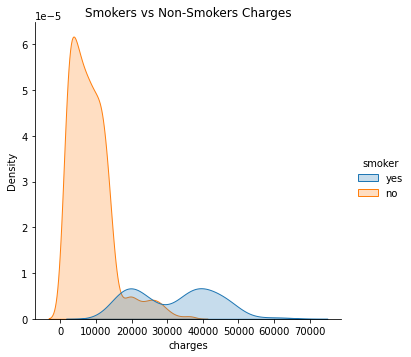

In [44]:
# sns.displot(initial_df, x="charges", hue="smoker", multiple="dodge")
sns.displot(initial_df, x="charges", hue="smoker", kind="kde",fill=True)
plt.title('Smokers vs Non-Smokers Charges')


Observation: 



**RELATIONSHIP BETWEEN SEX AND CHARGES**

Text(0.5, 1.0, 'Number of females and males')

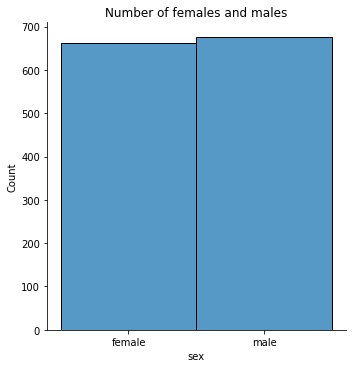

In [19]:
sns.displot(initial_df, x="sex")
plt.title("Number of females and males")

Text(0.5, 1.0, 'Female vs Male')

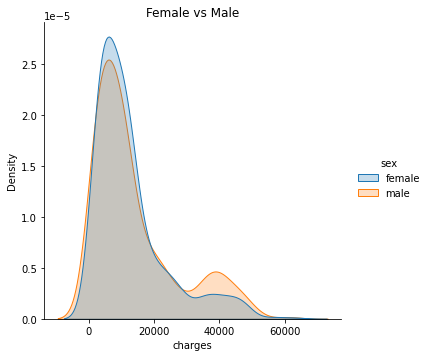

In [42]:
sns.displot(initial_df, x="charges", hue="sex", kind="kde",fill=True)
plt.title('Female vs Male')


Observation: 

The data is quite evenly split with regards to the number of females and males. Based on the distribution of both sexes, it can be seen that women, on average, pay less for medical insurance than men.

**RELATIONSHIP BETWEEN CHILDREN AND CHARGES**

Text(0.5, 1.0, 'Children and charges')

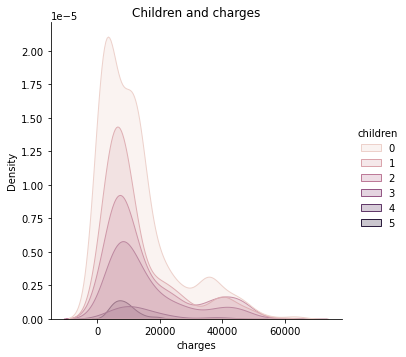

In [41]:
sns.displot(initial_df, x="charges", hue="children", kind="kde",fill=True)
plt.title('Children and charges')

Observation: 

There is no obvious trend in the relationship between the number of children a client has and the charges they incur on insurance. Having more children does neessarily relate to higher charges and vice-versa. 

**RELATIONSHIP BETWEEN CHILDREN AND AGES**

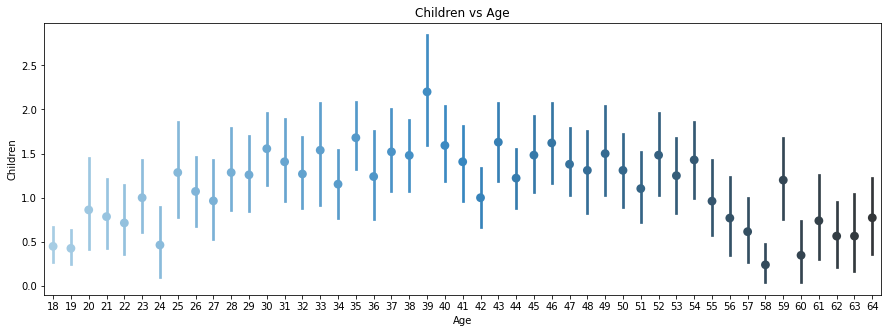

In [37]:
sns.pointplot(x=df.age, y=df.children, palette="Blues_d")

plt.gcf().set_size_inches(15, 5)
plt.title('Children vs Age')
plt.xlabel('Age')
plt.ylabel('Children')
plt.show()

OBSERVATION:


What we see is that the younger people have less kids and the number of children as dependencies peaks at 39. We notice that after 39 the number of children as dependencies gradually decreases. This is due to children becoming too old to be considered dependents and so they will slowly fall away as 'children' and start paying for their own medical aids. 

**AGE DISTRIBUTION**

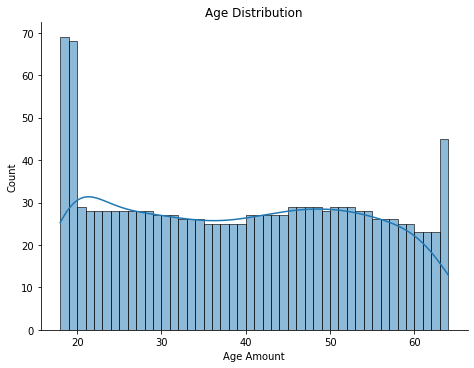

In [38]:
sns.displot(df['age'],bins=46,kde=True , palette="flare")

plt.gcf().set_size_inches(7, 5)

plt.title('Age Distribution')
plt.xlabel('Age Amount')

plt.show()

OBSERVATION: 

What can be observed from the diagram above is that the age counts peak in the lower and upper ends.  

The peaks at the lower ends could also indicate that 18 and 19 year olds are still paid for by their parents and so would have medical aids as opposed to 20 year olds that would be living alone and could not afford it.We also notice that there is a peak at 64 years old. This is understandable as older people tend to have more money and so prefer to use it on medical benefits. 



**RELATIONSHIP BETWEEN AGE AND CHARGES**

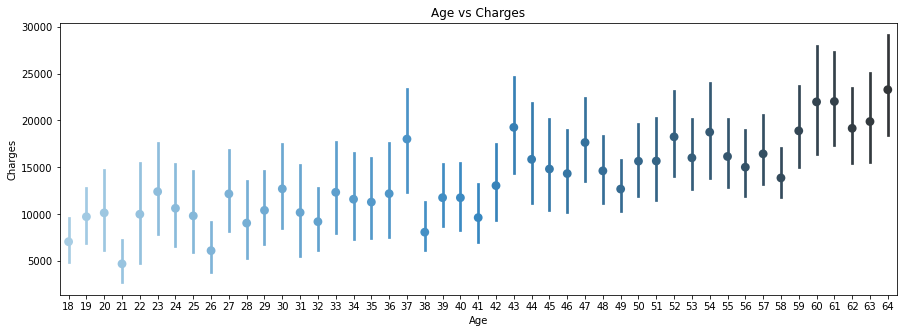

In [39]:
# sns.displot(initial_df, x="charges", hue="age", kind="hist",fill=True)

sns.pointplot(x=df.age, y=df.charges, palette="Blues_d")

plt.gcf().set_size_inches(15, 5)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
# plt.legend()
plt.show()

Older people tend to experience more health complications. This age group also exercise less and thus might have a higehr BMI than younger people. In addition to this, the effects of years of smoking could also be catching up to them. These, individually or in conjunction with eachotherm would inflate their charges. These individuals would also take longer to recover, implying higher charges due to recovery stay 

**RELATIONSHIP BETWEEN SMOKING AND AGE**

Text(0.5, 1.0, 'Age and Smokers')

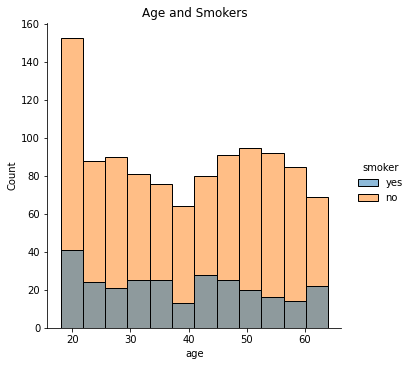

In [40]:
sns.displot(initial_df, x="age", hue="smoker", kind="hist",fill=True)
plt.title('Age and Smokers')


OBSERVATION:



**BMI DISTRIBUTION**

Clients with a BMI >30 are deemed obese

Text(0.5, 1.0, 'BMI Distribution')

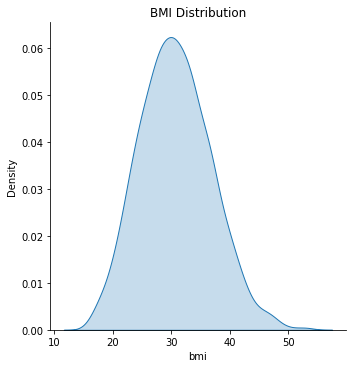

In [45]:
sns.displot(initial_df, x="bmi", kind="kde",fill=True)
plt.title('BMI Distribution')


What can be deduced from this distribution is that the mean BMI index is between 27 and 32.

In [27]:
df['obese'] = df['bmi'] >= 30
df.head()

,age,bmi,children,charges,premium,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest,obese
0,19,27.900,0,16884.92400,350,1,0,0,1,0,0,0,1,False
1,18,33.770,1,1725.55230,200,0,1,1,0,0,0,1,0,True
2,28,33.000,3,4449.46200,100,0,1,1,0,0,0,1,0,True
3,33,22.705,0,21984.47061,200,0,1,1,0,0,1,0,0,False
4,32,28.880,0,3866.85520,350,0,1,1,0,0,1,0,0,False


Text(0, 0.5, 'charges')

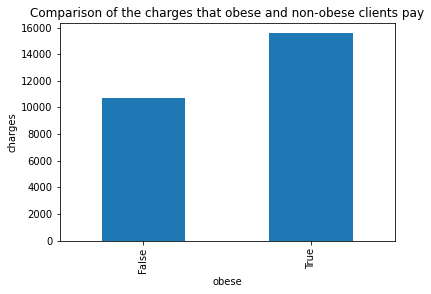

In [28]:
df.groupby('obese')['charges'].mean().plot(kind='bar')
plt.title('Comparison of the charges that obese and non-obese clients pay')
plt.ylabel('charges')

OBSERVATIONS:

The BMI index in the data is normally distributed. We can see that on average, clients that are obese pay significantly more in terms of charges for medical insurance, compare to clients that are not obese. This makes sense as clients who are obese are more at risk of heart attacks and medical complications. 

**IS THERE A RELATIONSHIP BETWEEN REGION AND AGE/CHARGES/SMOKE?**

Text(0.5, 1.0, 'Regions vs Age')

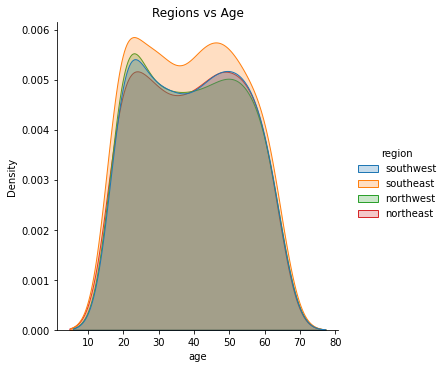

In [46]:
# REGION VS AGE 

sns.displot(initial_df, x="age", hue="region", kind="kde",fill=True)
plt.title('Regions vs Age')


Text(0.5, 1.0, 'Regions vs Charges')

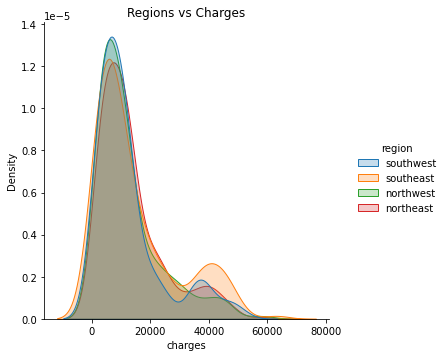

In [47]:
# REGION VS CHARGES 
sns.displot(initial_df, x="charges", hue="region", kind="kde",fill=True)
plt.title('Regions vs Charges')


Text(0.5, 1.0, 'Regions vs Smoker')

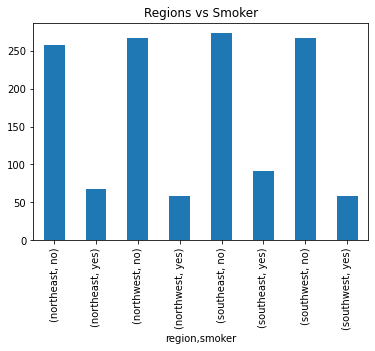

In [48]:
# REGION VS SMOKER
initial_df.groupby('region')['smoker'].value_counts().plot(kind='bar',stacked=True)
plt.title('Regions vs Smoker')


# Identifying the Highest Risk

The correlation matrix should indicate that smoker is strongly correlated with charges. Referring to the plots from earlier showing the charges for smokers, there should be a clear separation in higher and lower charges. What is causing this? What variable(s), when combined with smoker=True indicates a much higher claim amount? Provide plots to motivate your answer.

Answer: 

There is a clear separation in higher and lower charges. Clients who smoke pay higher charges in comparison to clients who don't smoke. The reason for this is that clients who smoke are at higher risk of lung cancer. Hence, these clients are more likely to incur higher medical costs due to a need of specialized treatment. 

In [32]:
df['obese_and_smoker'] = (df['obese'] & df['smoker_yes'])

In [33]:
df[df['obese_and_smoker'] != True]

,age,bmi,children,charges,premium,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest,obese,obese_and_smoker
0,19,27.900,0,16884.92400,350,1,0,0,1,0,0,0,1,False,False
1,18,33.770,1,1725.55230,200,0,1,1,0,0,0,1,0,True,False
2,28,33.000,3,4449.46200,100,0,1,1,0,0,0,1,0,True,False
3,33,22.705,0,21984.47061,200,0,1,1,0,0,1,0,0,False,False
4,32,28.880,0,3866.85520,350,0,1,1,0,0,1,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,350,0,1,1,0,0,1,0,0,True,False
1334,18,31.920,0,2205.98080,500,1,0,1,0,1,0,0,0,True,False
1335,18,36.850,0,1629.83350,200,1,0,1,0,0,0,1,0,True,False
1336,21,25.800,0,2007.94500,100,1,0,1,0,0,0,0,1,False,False


Text(0, 0.5, 'charges')

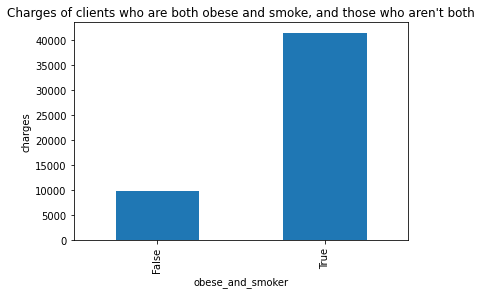

In [34]:
df.groupby('obese_and_smoker')['charges'].mean().plot(kind='bar')
plt.title("Charges of clients who are both obese and smoke, and those who aren't both")
plt.ylabel('charges')

OBSERVATION:

Based on the plot

In [35]:
# print(df[(df['obese'] != True) & (df['smoker_yes'] != True)]['charges'].mean())
# print(df[(df['obese']) & (df['smoker_yes'] != True)]['charges'].mean())
# print(df[(df['obese'] != True) & (df['smoker_yes'])]['charges'].mean())
# print(df[df['obese_and_smoker']]['charges'].mean())

In [36]:
df.groupby(['obese','smoker_yes'])['charges'].mean()


obese  smoker_yes
False  0              7977.029520
       1             21363.217016
True   0              8842.691548
       1             41557.989840
Name: charges, dtype: float64